# Gradient

This notebook demonstrates how to use *OptiWindNet*’s `gradient()` function to analyze how small position changes in turbines or substations affect total cable length and cost. Through simple, controlled examples, we’ll calculate gradients for both distance and cost objectives, verify them against expected behavior, and explore the effect of temporarily substituting new coordinates without altering the underlying network object. The gradient function provides a practical way to assess sensitivity and guide layout optimization decisions.


## Import required packages

In [15]:
from optiwindnet.api import WindFarmNetwork
import numpy as np

In [16]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

## A sample network

Create a sample network with one substation and two wind turbines.

In [17]:
substationsC = np.array([[0, 0]])
turbinesC = np.array([[0, 1], [1, 1]])
borderC = np.array([[-0.1, -0.1], [-0.1, 1.1], [1.1, 1.1], [1.1, -0.1]],
    dtype=float)

Create an instance of WindFarmNetwork based on the defined data.

In [18]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=[(5, 1800.0)], borderC=borderC)

Plot location (without the cabling layout)

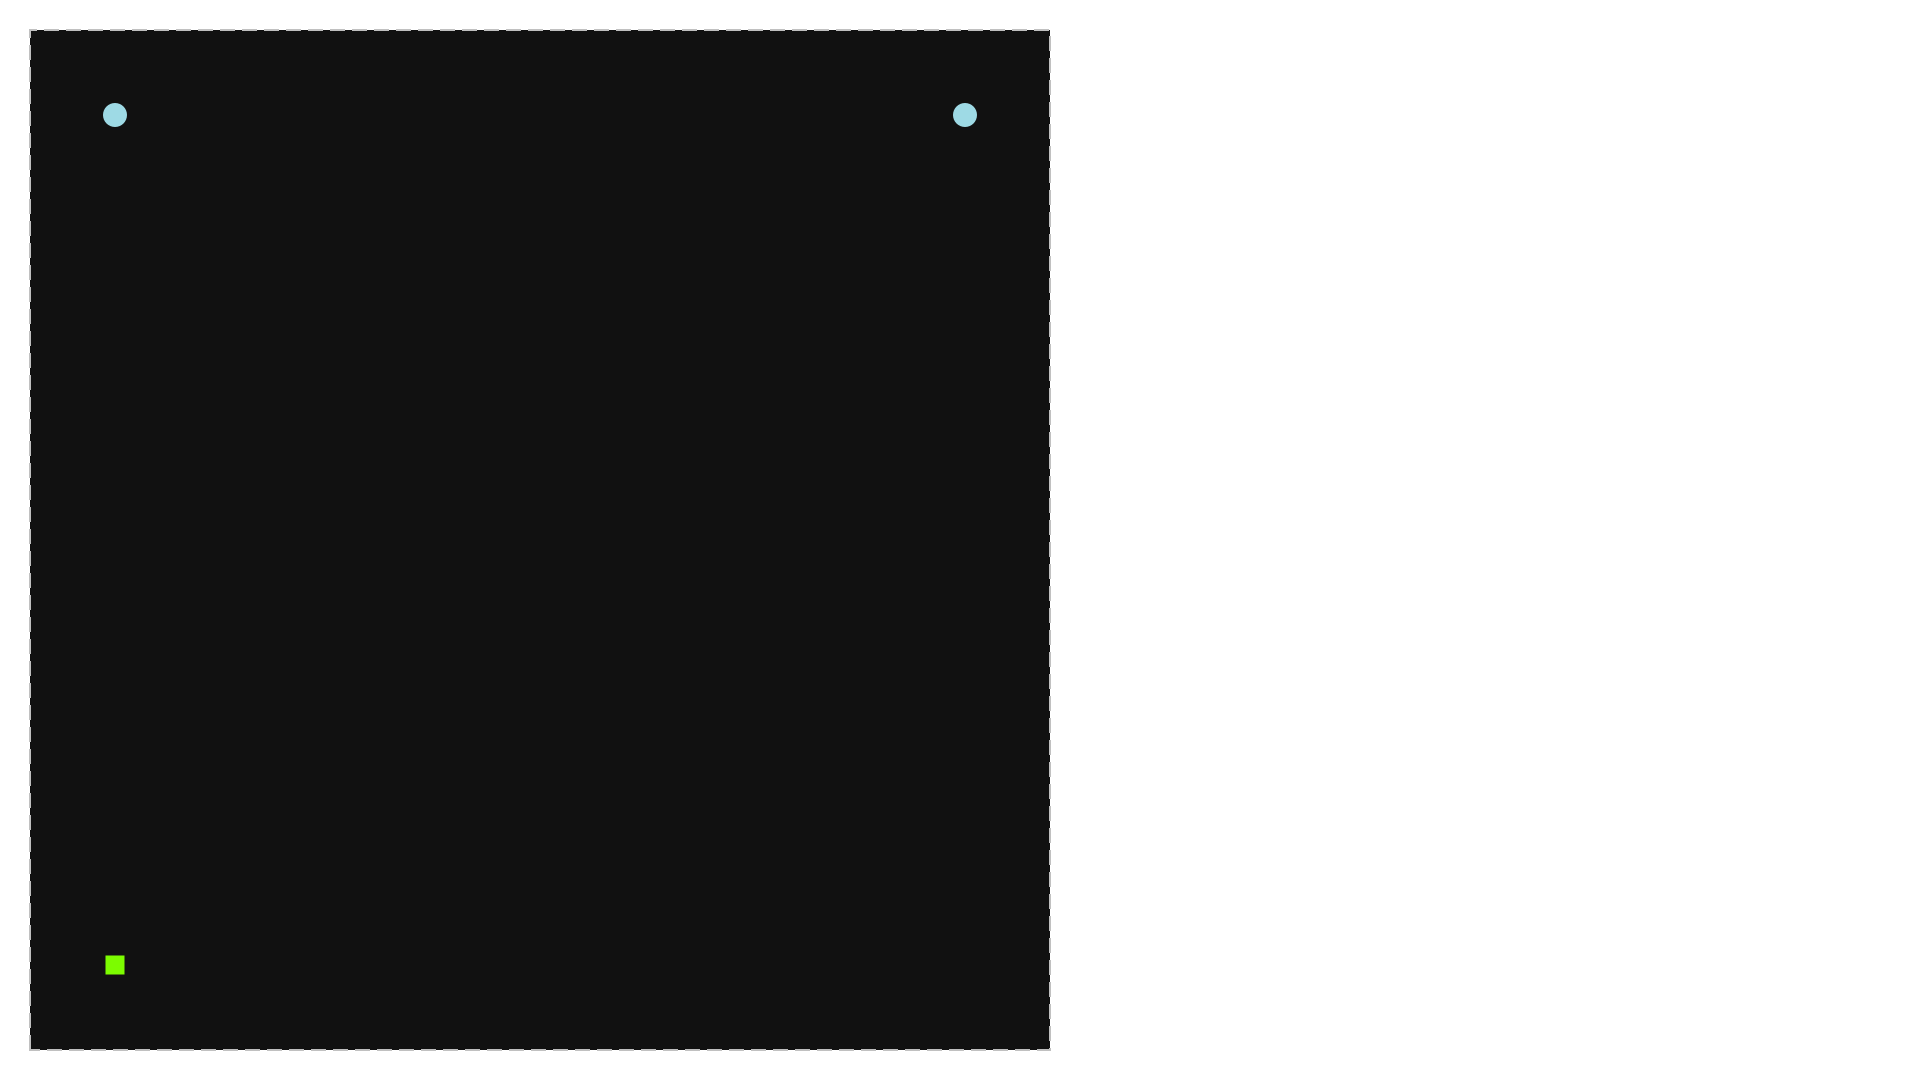

In [19]:
wfn # or wfn.plot_location()

### Optimize

Run optimization with the default solver.

In [20]:
res_optimize = wfn.optimize()

Plot final layout

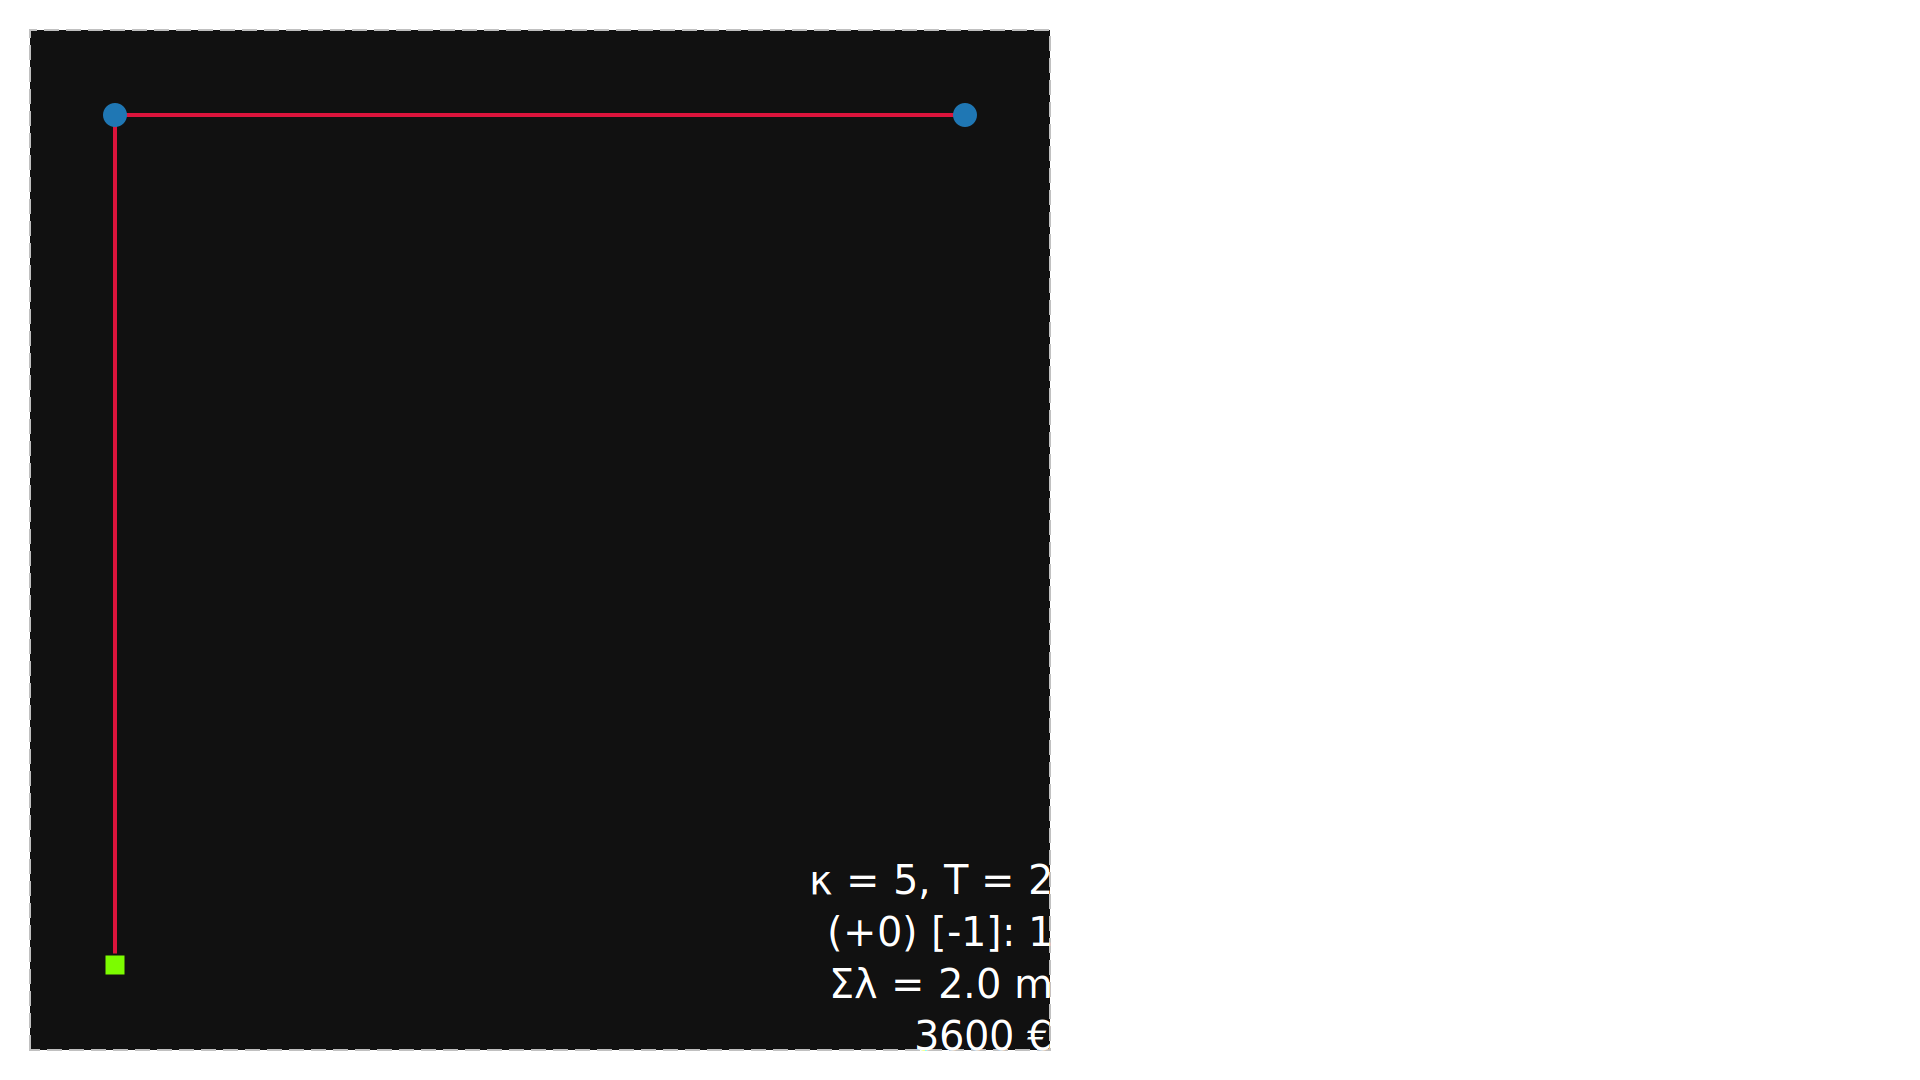

In [21]:
wfn

## Calculate gradients

### Gradient of length (default)
Calculate gradient of turbines and substation using gradient() function. The expected gradient values are that moving first WT on x-axis infiniticimally will reduce the total length equally while on y-axis will increase the total length. And accordingly for the other turbine and substaion. The output of gradient() function is matching with the expectation.

In [22]:
grad_wts, grad_ss = wfn.gradient()
print('WTs gradient: ')
print(grad_wts)
print()
print('SS gradient: ')
print(grad_ss)

WTs gradient: 
[[-1.  1.]
 [ 1.  0.]]

SS gradient: 
[[ 0. -1.]]


### Gradient of cost

In [23]:
grad_wts, grad_ss = wfn.gradient(gradient_type='cost')
print('WTs gradient: ')
print(grad_wts)
print()
print('SS gradient: ')
print(grad_ss)

WTs gradient: 
[[-1800.  1800.]
 [ 1800.     0.]]

SS gradient: 
[[    0. -1800.]]


#### Gradient with new coordinates

Example 1

In [24]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[0.5, 0],], dtype=float))
print('WTs gradient: ')
print(grad_wts)
print()
print('SS gradient: ')
print(grad_ss)

WTs gradient: 
[[-1.4472136   0.89442719]
 [ 1.          0.        ]]

SS gradient: 
[[ 0.4472136  -0.89442719]]


Example 2

In [25]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[-1, 1],], dtype=float))
print('WTs gradient: ')
print(grad_wts)
print()
print('SS gradient: ')
print(grad_ss)

WTs gradient: 
[[0. 0.]
 [1. 0.]]

SS gradient: 
[[-1.  0.]]


> Note:  `.gradient()` will calculate gradients with new coordinate **but do not update the `wfn` object. For example if we plot the layout, original coordinates are depicted. If you need to update `wfn` see the notebook about [WindFarmNetwork class of API](a02_WindFarmNetwork.ipynb)

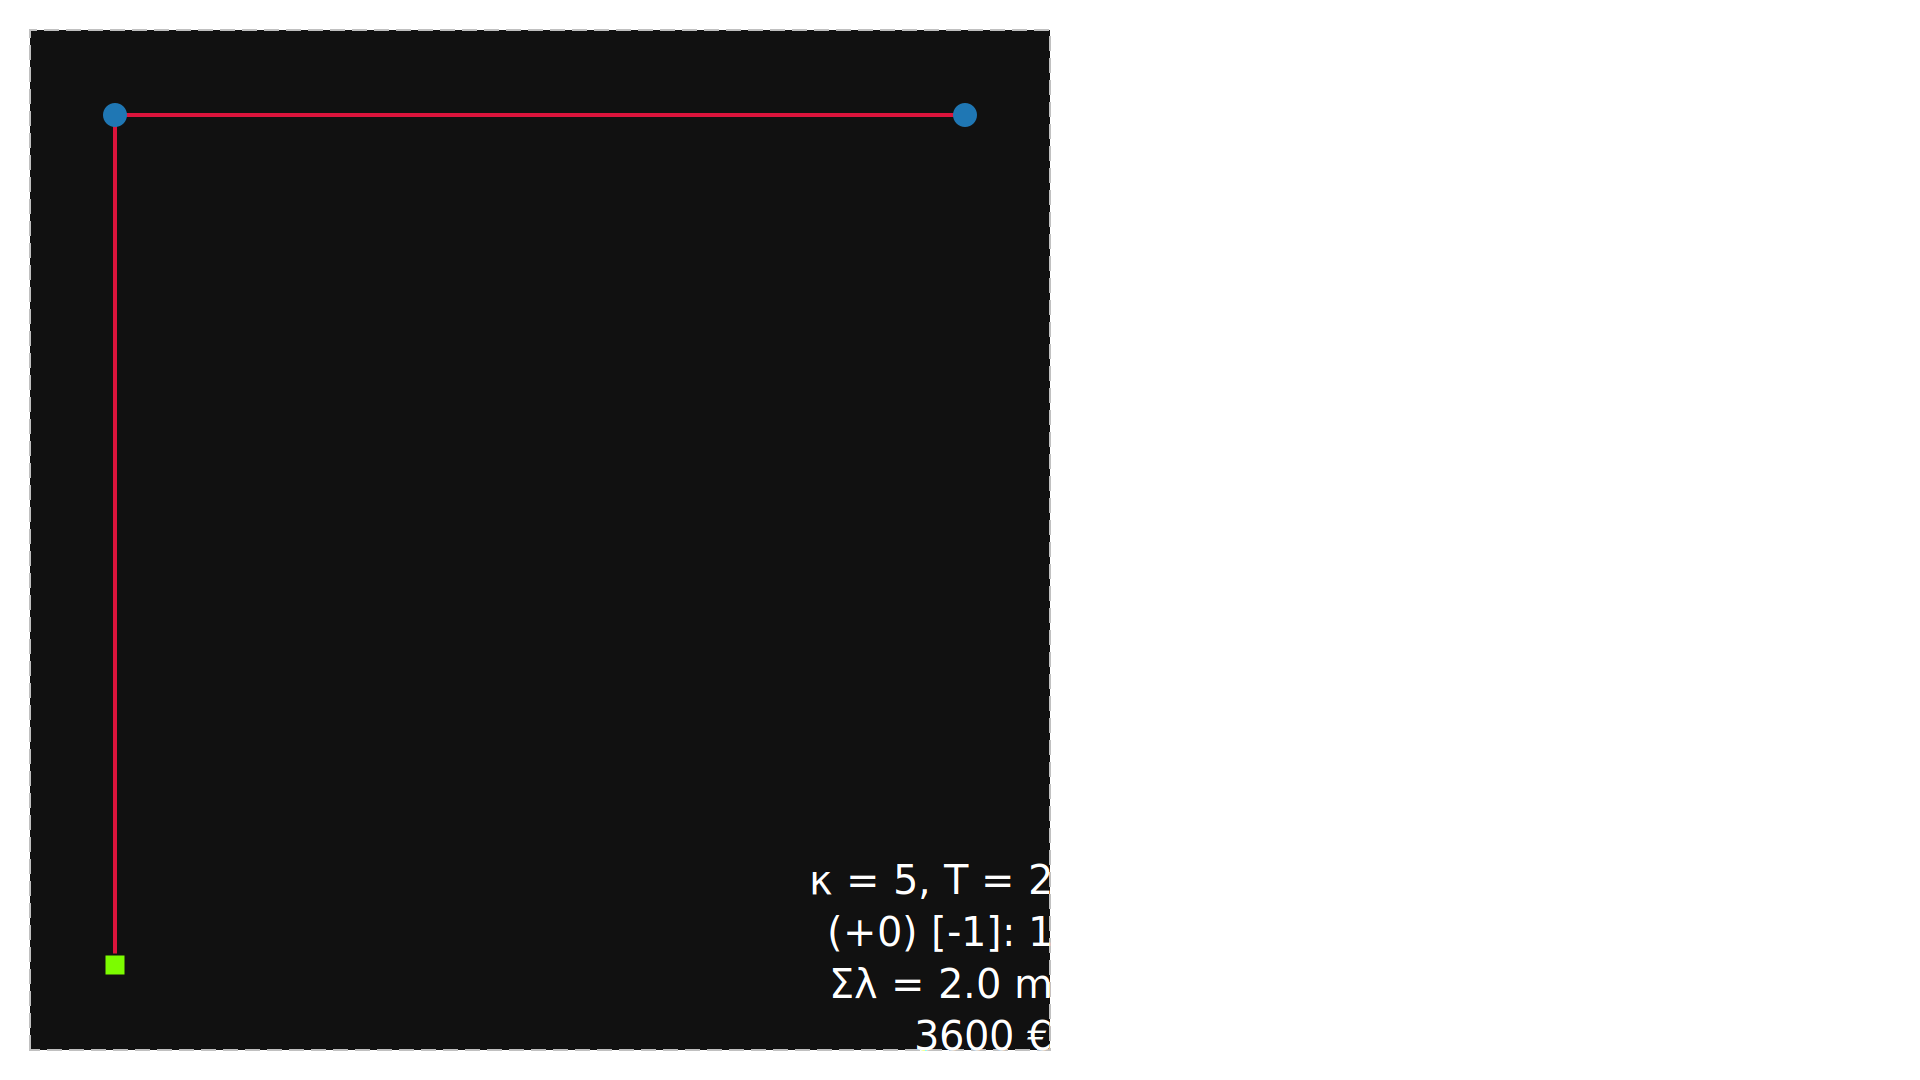

In [26]:
wfn